# Introduction
Learning about machine learning and python at the same time.
Jupyter notebook seems so interesting.

Also, I might skip some chapters if I already know them, for example, the probabilities and statistics.

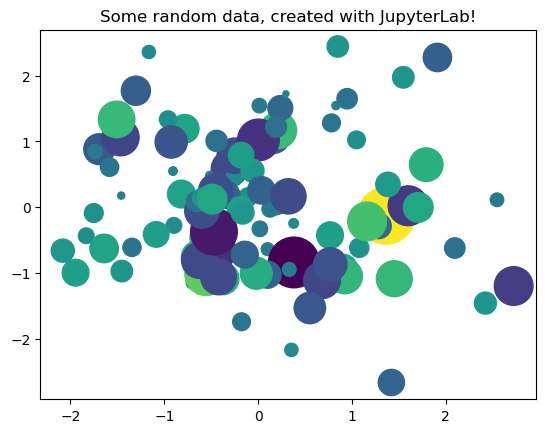

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

This is the note for reading **Math for Deep Learning**.


## Using the numpy Package
At the beginning of all our works, we first need to import the numpy package.

In [2]:
import numpy as np
a = np.arange(50).reshape((5,10))
print(a)
print(a[:4,1:3])
print(a[:,::-1])

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
[[ 1  2]
 [11 12]
 [21 22]
 [31 32]]
[[ 9  8  7  6  5  4  3  2  1  0]
 [19 18 17 16 15 14 13 12 11 10]
 [29 28 27 26 25 24 23 22 21 20]
 [39 38 37 36 35 34 33 32 31 30]
 [49 48 47 46 45 44 43 42 41 40]]


The ":" means all the elements along the specific dimension.
And incrementing by -1 means to reverse the values. Incrementing by 2 just print every other number.

## Importing Data

Numpy array can be written and loaded from the disk.
By using the `np.save` and `np.load` functions.

In [3]:
a = np.random.randint(0,5,(3,4))
print("a:")
print(a)
np.save("random.npy",a)
b = np.load("random.npy")
print("b:")
print(b)

a:
[[0 0 4 3]
 [1 2 2 0]
 [4 4 0 3]]
b:
[[0 0 4 3]
 [1 2 2 0]
 [4 4 0 3]]


## The SciPy package

In [4]:
import scipy
scipy.__version__

'1.9.3'

A quick test:

In [5]:
import numpy as np
from scipy.stats import ttest_ind
a = np.random.normal(0,1,1000)
b = np.random.normal(0,0.5,1000)
c = np.random.normal(0.1,1,1000)
test1 = ttest_ind(a,b)
test2 = ttest_ind(a,c)
print(test1)
print(test2)

Ttest_indResult(statistic=-0.8624574201406549, pvalue=0.38853935863324807)
Ttest_indResult(statistic=-2.379945116226474, pvalue=0.017408549917166023)


In the `np.random.normal()` function, all the different data points are extracted from a normal distribution (or say a Gaussian curve). The first parameter is the average, the second the standard deviation.

In this example, a and b are more likely to be similar because they have the same average value. Their difference lies in the standard deviation, which contributes to only a small part in the t-test.

## Matplotlib
Matplotlib are used to generate graphs.

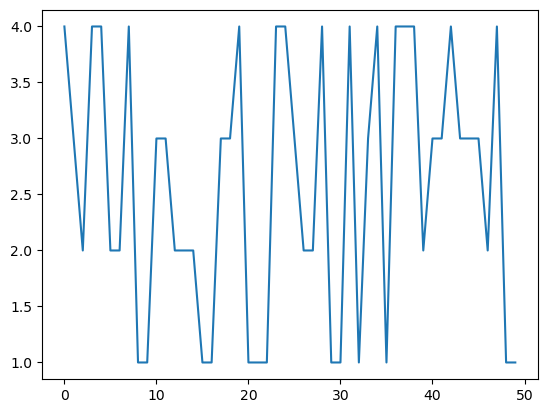

array([4, 3, 2, 4, 4, 2, 2, 4, 1, 1, 3, 3, 2, 2, 2, 1, 1, 3, 3, 4, 1, 1,
       1, 4, 4, 3, 2, 2, 4, 1, 1, 4, 1, 3, 4, 1, 4, 4, 4, 2, 3, 3, 4, 3,
       3, 3, 2, 4, 1, 1])

In [6]:
import numpy as np
import matplotlib.pylab as plt
x = np.random.randint(1,5,50)
plt.plot(x)
plt.show()
x

You can also plot a 3D plot using the Matplotlib.

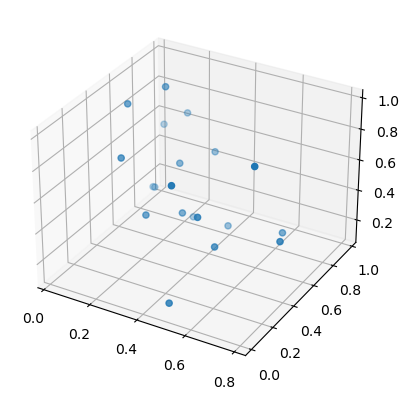

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as plt
import numpy as np
x = np.random.random(20)
y = np.random.random(20)
z = np.random.random(20)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
plt.show()

## Scikit-Learn
Sometimes in this book, we might need to implement deep-learning and build a simple neural network or two. In this case, we will use `sklearn`.

As an example, we quickly build a simple neural network to classify small $8\times8$-pixel grayscale images of handwritten digits, and the dataset is built into sklearn.

In [9]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier

#1
d = load_digits()
digits = d["data"]
labels = d["target"]

#2
N = 200
idx = np.argsort(np.random.random(len(labels)))
x_test, y_test = digits[idx[:N]], labels[idx[:N]]
x_train, y_train = digits[idx[N:]], labels[idx[N:]]

#3
clf = MLPClassifier(hidden_layer_sizes=(128,))
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)
pred = clf.predict(x_test)
err = np.where(y_test != pred)[0]
print("score :", score)
print("errors:")
print("    actual   :", y_test[err])
print("    predicted:", pred[err])

score : 0.99
errors:
    actual   : [5 1]
    predicted: [9 8]


1. The first steps are importing the `load_digits` function to return small digit image dataset and the `MLPClassifier` class to train the traditional neural network, a multilayer perceptron (whatever that is). We get the images and their associating labels (0...9). Because the images are $8\times8$, and there are 1797 images in total. `digits` is actually a 2D NumPy array with 1797 rows, and 64 columns per row. `labels` is just a vector with 1797 digit labels.
2. We randomize the order of the images (remember to keep the right label with the right digit) and extract train and test data. `np.argsort()` returns the indicies that will sort the array. In this way, we extracted the first 200 digit images as the test data, and use the rest 1579 digit images as the training data.
3. Finally, we build a model with an instance of the MLPClassifier. We only specify the size of the hidden layer, which is the double of the elements in the vector.

We finally get the overall accuracy (`score`) for our model (`clf`). And we can see all the errors. The `np.where` function returns an array and the first element is the index.

## A Hand-written Neural Network

This part is an extra part not mentioned in the book,  adapted from the youtube video [here](https://youtu.be/w8yWXqWQYmU). In this part, we are going to build a neural network that is also designed to recognize hand-writen numbers. The hand-writen numbers we use in this example is 28*28 pixels, and there is only one hidden layer with 10 perceptrons in the only hidden layer. So let's dive into the maths.

### Forward propagation
During the forward propagation, that is, sending the greyness of each pixel via 784 nodes into the neural networks, we will finally get a result.
$$\mathbf\mathit{Z}^{[1]} = \mathbf\mathit{W}^{[1]} \mathbf\mathit{X} + \mathbf\mathit{b}^{[1]}$$
$$\mathbf\mathit{A}^{[1]} = g_{ReLU}(\mathbf\mathit{Z}^{[1]})$$
$$\mathbf\mathit{Z}^{[2]} = \mathbf\mathit{W}^{[2]} \mathbf\mathit{X} + \mathbf\mathit{b}^{[2]}$$
$$\mathbf\mathit{A}^{[2]} = g_{softmax}(\mathbf\mathit{Z}^{[2]})$$


### Backward propagation
We get the variances between our predicted result and the real result. We than plug it back into the previous weights to get how much these weights need to deviate by.

$$d\mathbf\mathit{Z}^{[2]} = \mathbf\mathit{A}^{[2]} - \mathbf\mathit{Y}$$
$$d\mathbf\mathit{W}^{[2]} = \frac{1}{m} d\mathbf\mathit{Z}^{[2]} \mathbf\mathit{A}^{[1]T}$$
$$d\mathbf\mathit{B}^{[2]} = \frac{1}{m} \Sigma {d\mathbf\mathit{Z}^{[2]}}$$
$$d\mathbf\mathit{Z}^{[1]} = \mathbf\mathit{W}^{[2]T} d\mathbf\mathit{Z}^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$d\mathbf\mathit{W}^{[1]} = \frac{1}{m} d\mathbf\mathit{Z}^{[1]} \mathbf\mathit{A}^{[0]T}$$
$$d\mathbf\mathit{B}^{[1]} = \frac{1}{m} \Sigma {d\mathbf\mathit{Z}^{[1]}}$$

### Parameter update
$$\mathbf\mathit{W}^{[2]} := \mathbf\mathit{W}^{[2]} - \alpha d\mathbf\mathit{W}^{[2]}$$
$$\mathbf\mathit{b}^{[2]} := \mathbf\mathit{b}^{[2]} - \alpha d\mathbf\mathit{b}^{[2]}$$
$$\mathbf\mathit{W}^{[1]} := \mathbf\mathit{W}^{[1]} - \alpha d\mathbf\mathit{W}^{[1]}$$
$$\mathbf\mathit{b}^{[1]} := \mathbf\mathit{b}^{[1]} - \alpha d\mathbf\mathit{b}^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

And now let's start to code!!!

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

raw_data = pd.read_csv('./digit-recognizer/train.csv')

In [18]:
data = np.array(raw_data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0 : 1000].T
Y_test = data_test[0]
X_test = data_test[1 : n]
X_test = X_test/ 255.
"The pixels are divided by 255 because the greyness are indicated by a number between 1:255"

data_train = data[1000 : m].T
Y_train = data_train[0]
X_train = data_train[1 : n]
X_train = X_train / 255.

_, m_train = X_train.shape

In [19]:
"First we randomly initialize all the parameters (weights, biases etc)"
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    """In python, boolean can be returned as a number and is 1 when true and 0 when false."""
    return Z>0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [20]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [21]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 6 0 ... 6 0 0] [7 6 7 ... 6 1 0]
0.11290243902439025
Iteration:  50
[8 6 9 ... 6 1 0] [7 6 7 ... 6 1 0]
0.5135121951219512
Iteration:  100
[8 6 9 ... 6 1 0] [7 6 7 ... 6 1 0]
0.6719756097560976
Iteration:  150
[8 6 7 ... 6 1 0] [7 6 7 ... 6 1 0]
0.7375853658536585
Iteration:  200
[8 6 7 ... 6 1 0] [7 6 7 ... 6 1 0]
0.7729512195121951
Iteration:  250
[8 6 7 ... 6 1 0] [7 6 7 ... 6 1 0]
0.7968536585365854
Iteration:  300
[8 6 7 ... 6 1 0] [7 6 7 ... 6 1 0]
0.8133658536585365
Iteration:  350
[8 6 7 ... 6 1 0] [7 6 7 ... 6 1 0]
0.8265365853658536
Iteration:  400
[8 6 7 ... 6 1 0] [7 6 7 ... 6 1 0]
0.8369756097560975
Iteration:  450
[8 6 7 ... 6 1 0] [7 6 7 ... 6 1 0]
0.8459268292682927


In [22]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

And some examples:

Prediction:  [8]
Label:  7


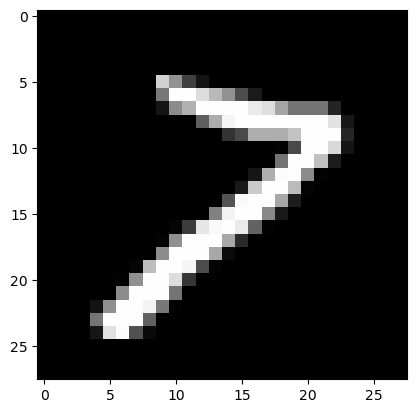

Prediction:  [6]
Label:  6


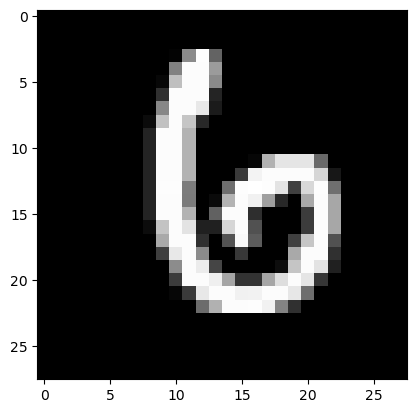

Prediction:  [7]
Label:  7


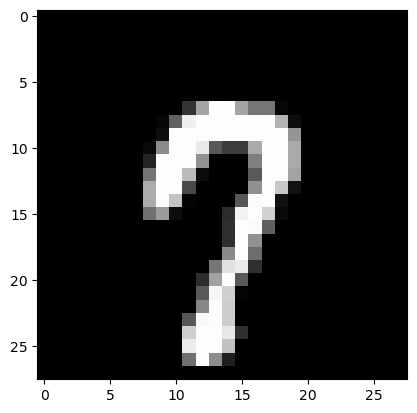

Prediction:  [4]
Label:  4


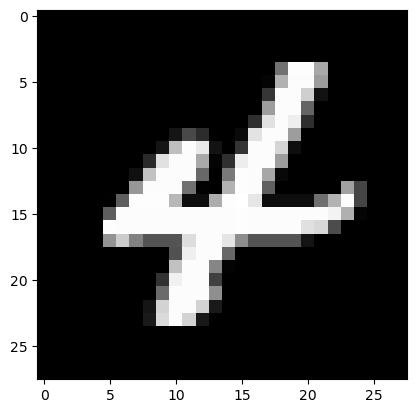

Prediction:  [4]
Label:  4


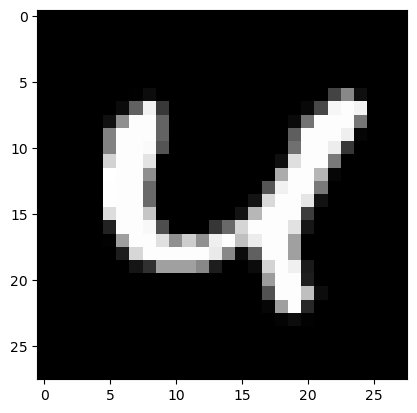

In [23]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)

And finally, let's find out about the accuracy of our neural network.

In [24]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(test_predictions, Y_test)

[3 0 2 8 6 7 8 1 2 2 3 4 9 0 8 3 8 8 6 3 4 3 7 4 9 4 6 1 6 6 3 3 4 6 1 7 4
 0 8 6 8 2 9 0 1 7 1 9 6 0 4 4 6 0 2 1 7 5 6 6 4 2 2 1 4 5 5 0 5 3 0 8 8 0
 3 3 0 2 4 6 5 1 4 9 7 2 7 8 6 4 3 3 0 4 0 2 1 6 2 9 1 6 6 5 7 7 9 4 9 8 3
 1 2 4 4 0 6 9 6 9 1 3 8 2 6 4 6 4 1 1 4 3 9 9 0 5 9 6 2 4 1 3 1 9 6 5 8 6
 1 0 2 4 6 1 8 0 8 2 2 5 3 3 4 7 7 7 4 0 6 9 2 8 9 9 7 9 8 2 5 6 0 2 4 1 8
 1 4 1 8 0 5 3 3 5 9 1 5 1 0 8 1 3 5 4 3 7 9 6 0 2 2 0 9 0 0 9 0 5 0 4 7 2
 5 8 2 5 6 3 3 6 6 4 0 0 1 2 3 3 4 9 7 7 6 4 3 9 5 5 5 8 7 7 5 5 6 4 2 9 6
 3 4 9 1 2 6 4 3 9 5 7 9 8 7 2 4 6 9 7 1 4 4 4 4 1 9 3 1 9 7 4 3 2 4 6 3 1
 2 0 0 9 9 6 4 8 3 3 0 8 4 0 5 1 3 0 2 5 0 4 6 1 4 8 0 6 3 7 1 9 6 5 6 8 3
 6 4 1 9 0 2 1 1 7 1 5 7 3 3 5 1 8 7 4 5 7 1 9 1 4 9 6 4 1 1 4 9 2 6 7 7 7
 3 1 7 8 9 0 3 0 2 0 1 3 3 3 7 8 7 2 9 2 2 8 0 2 0 7 9 1 6 1 0 5 9 6 2 9 9
 5 2 1 4 4 6 7 3 9 9 9 4 5 1 8 7 0 1 7 0 7 8 5 8 2 2 2 7 7 9 4 5 7 1 9 6 8
 6 6 1 3 8 0 3 3 1 1 1 6 8 6 4 1 1 5 6 3 8 0 2 5 3 9 3 9 1 9 6 4 5 6 3 3 5
 9 0 8 7 1 2 3 2 9 8 5 1 

0.84